In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

In [60]:
df=pd.read_csv("nearest-earth-objects(1910-2024).csv")
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [61]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [62]:
df=df.dropna()
df.shape

(338171, 9)

In [63]:
features=[
    "absolute_magnitude",
    "estimated_diameter_min",
    "estimated_diameter_max",
    "relative_velocity",
    "miss_distance"
]
df=df[features]
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07


In [64]:
df["risk"]=np.where(
    df["miss_distance"]<df["miss_distance"].quantile(0.25),1,0
)
df["risk"].value_counts()

risk
0    253628
1     84543
Name: count, dtype: int64

In [65]:
X=df.drop("risk",axis=1)
y=df["risk"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [66]:
rf_model=RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

In [67]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))

Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50726
           1       1.00      1.00      1.00     16909

    accuracy                           1.00     67635
   macro avg       1.00      1.00      1.00     67635
weighted avg       1.00      1.00      1.00     67635



Text(50.722222222222214, 0.5, 'Actual')

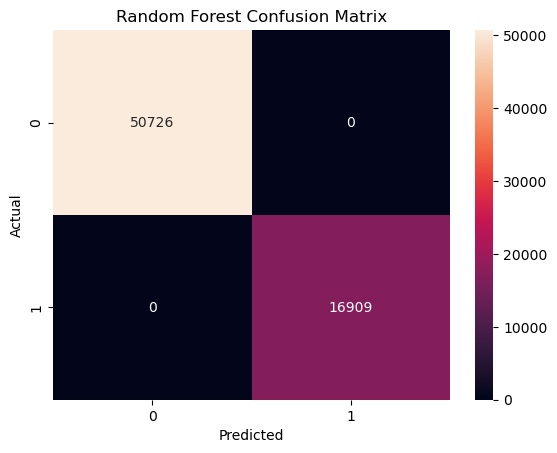

In [68]:
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [69]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [70]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Accuracy: 0.9781917646189103
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99     50726
           1       0.96      0.95      0.96     16909

    accuracy                           0.98     67635
   macro avg       0.97      0.97      0.97     67635
weighted avg       0.98      0.98      0.98     67635

Confusion Matrix: [[50099   627]
 [  848 16061]]


Text(50.722222222222214, 0.5, 'Actual')

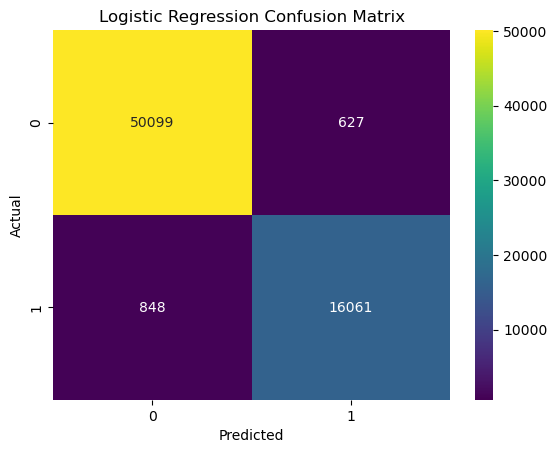

In [71]:
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="viridis")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)

In [74]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Accuracy: 0.9823759887632143
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99     50726
           1       0.96      0.97      0.96     16909

    accuracy                           0.98     67635
   macro avg       0.98      0.98      0.98     67635
weighted avg       0.98      0.98      0.98     67635

Confusion Matrix: [[50111   615]
 [  577 16332]]


Text(50.722222222222214, 0.5, 'Actual')

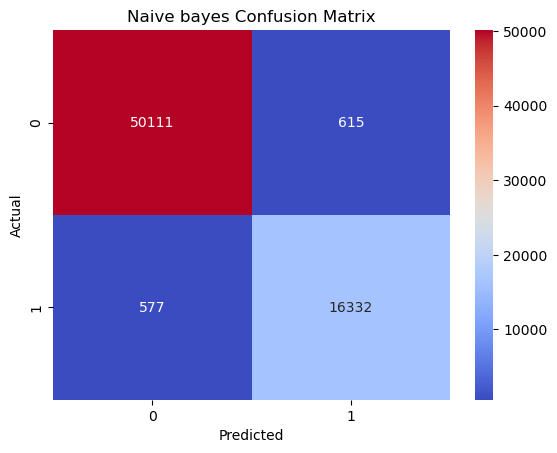

In [75]:
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="coolwarm")
plt.title("Naive bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)

In [78]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50726
           1       1.00      1.00      1.00     16909

    accuracy                           1.00     67635
   macro avg       1.00      1.00      1.00     67635
weighted avg       1.00      1.00      1.00     67635

Confusion Matrix: [[50726     0]
 [    0 16909]]


Text(50.722222222222214, 0.5, 'Actual')

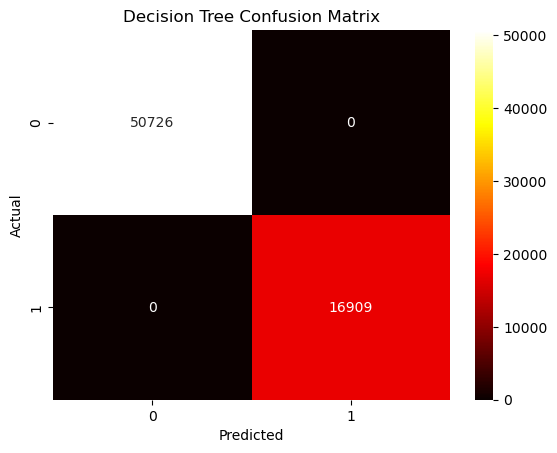

In [79]:
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="hot")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [80]:
from sklearn.svm import SVC

In [81]:
svm_model=SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)

In [82]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Accuracy: 0.9999556442670215
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50726
           1       1.00      1.00      1.00     16909

    accuracy                           1.00     67635
   macro avg       1.00      1.00      1.00     67635
weighted avg       1.00      1.00      1.00     67635

Confusion Matrix: [[50723     3]
 [    0 16909]]


Text(50.722222222222214, 0.5, 'Actual')

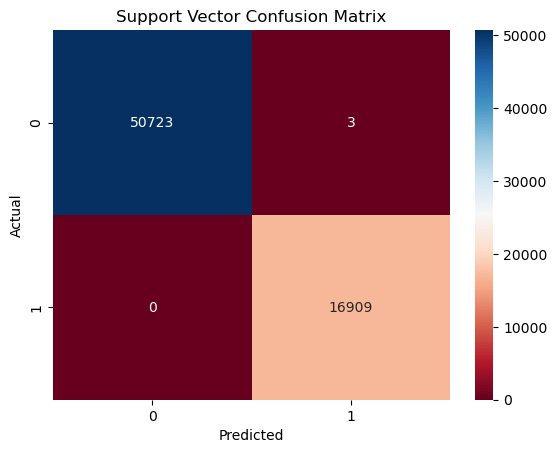

In [83]:
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="RdBu")
plt.title("Support Vector Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")